# This is the Juypter Notebook containing simulations for Theorem 6 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [9]:
import bivirus
import numpy as np
import importlib
importlib.reload(bivirus)

<module 'bivirus' from '/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py'>

In [10]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [11]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
A1_raw, A2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
A1_thres = np.where(A1_raw < config.threshold, 0, A1_raw)
A2_thres = np.where(A2_raw < config.threshold, 0, A2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
A1 = A1_thres + path_graph_adjacency(config.N, W=config.W/10)
A2 = A2_thres + path_graph_adjacency(config.N, W=config.W/10)

beta = [
    70 * np.ones(config.N),
    0.4 * np.ones(config.N)
]
B1 = np.diag(beta[0]) @ A1
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
delta = [
    10 * np.ones(config.N),
    1 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[105.03567245 132.02392448   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.         109.34804354 117.29384997   0.        ]
 [ 13.99417809 125.48892829  11.97809214   0.         132.88765184
  122.76073331   0.           0.         113.15008978 139.26357521
    0.           0.           0.           0.           0.
  133.90350176   0.         128.04054612   0.           0.        ]
 [  0.          10.67871107   0.         126.97425348   0.
    0.           0.         129.72689423   0.           0.
    0.           0.           0.         114.1328248  106.80276034
  106.93991888   0.           0.         105.68789524   0.        ]
 [  0.         121.37281346 136.6315222    0.           7.43406321
  118.82282416   0.           0.         132.66799836   0.
    0.           0.         115.30452921   0.         139.5308917
    0.           0.           0.          

/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_5185/3828916399.py:22: RuntimeWarning: divide by zero encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_5185/3828916399.py:22: RuntimeWarning: overflow encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_5185/3828916399.py:22: RuntimeWarning: invalid value encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_5185/3828916399.py:23: RuntimeWarning: divide by zero encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_5185/3828916399.py:23: RuntimeWarning: overflow encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_5185/3828916399.py:23: RuntimeWarning: invalid value encountered in matmul
  B2 = np.diag(beta[1]) @ A2


In [12]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 1.5916807849594732
spectral radius 2 is 1.0026796597001768
Theorem 2 satisfied: False
Theorem 3: 0


In [13]:
# calculate the boundary equilibria corresponding to virus 1 and virus 2
x1_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[0], delta[0], config)
x2_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[1], delta[1], config)
print("x1_bar: ", x1_bar)
print("x2_bar: ", x2_bar)

# Confirm whether the boundary equilibria for one virus is component-wise greater than the other
print("\nx1_bar << x2_bar:", np.all(x1_bar < x2_bar)) 
print("x1_bar >> x2_bar:", np.all(x1_bar > x2_bar))

x_bar Converged at iteration 44
x_bar Converged at iteration 4919
x1_bar:  [0.97853329 0.98910831 0.98567761 0.98853238 0.98642342 0.97997801
 0.97962682 0.98485314 0.98035157 0.98975104 0.97306949 0.96356968
 0.97158146 0.97218996 0.98327942 0.98457824 0.97985581 0.98813121
 0.9755022  0.97955135]
x2_bar:  [0.70029302 0.65886484 0.79045846 0.70874433 0.78629961 0.74565865
 0.76690293 0.72070267 0.69537597 0.73767799 0.8040394  0.3769378
 0.80008888 0.68169175 0.59075014 0.73646307 0.59409899 0.71709048
 0.69210426 0.76341949]

x1_bar << x2_bar: False
x1_bar >> x2_bar: True


/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:67: RuntimeWarning: divide by zero encountered in matmul
  x = x + h * ((np.eye(N) - np.diag(x)) @ B1 - np.diag(delta)) @ x
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:67: RuntimeWarning: overflow encountered in matmul
  x = x + h * ((np.eye(N) - np.diag(x)) @ B1 - np.diag(delta)) @ x
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:67: RuntimeWarning: invalid value encountered in matmul
  x = x + h * ((np.eye(N) - np.diag(x)) @ B1 - np.diag(delta)) @ x


## Part i. the equilibrium point (0, 0) is unstable

To validate part i) of Theorem 6, we add a small pertubation to (0, 0) and use that as the initial conditions, and run simulations of the system till convergance. 

/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:32: RuntimeWarning: divide by zero encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:32: RuntimeWarning: overflow encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:32: RuntimeWarning: invalid value encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:33: RuntimeWarning: divide by zero encountered in matmul
  x[1] = x[1] + h * ((np.eye(N) - sum_of_x) @ B[1] - np.diag(delta[1])) @ x[1]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:33: Runt

x1 is [0.09715804 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804
 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804
 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804
 0.09715804 0.09715804]
x2 is [0.08262027 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027
 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027
 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027
 0.08262027 0.08262027]
All assumptions satisfied
Main loop Converged at iteration 6316
x1 is [0.03887839 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839
 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839
 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839
 0.03887839 0.03887839]
x2 is [0.01962764 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764
 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764
 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764
 0.01962764 0.01962764]
All assumpti

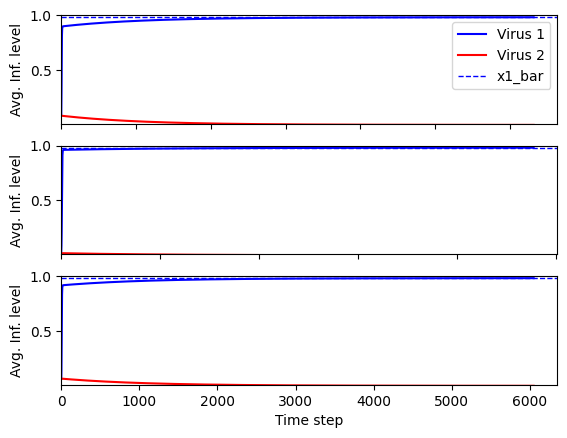

In [14]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for i in range(3):
    pertubation = np.random.uniform(0, 0.1)
    x1.fill(pertubation)
    print("x1 is "+str(x1))
    pertubation = np.random.uniform(0, 0.1)
    x2.fill(pertubation)
    print("x2 is " + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)

    # record results
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), yscale='linear')


## Part ii. The equilibrium ($0, \bar{x}_2$) is unstable

To validate part ii) of the theorem, we will add a small pertubation to ($0, \bar{x}_2$) and use that as the initial conditions for the simulation.

x1 is [0.01758202 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202
 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202
 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202
 0.01758202 0.01758202]
x2 is [0.71787503 0.67644686 0.80804048 0.72632635 0.80388162 0.76324067
 0.78448494 0.73828468 0.71295799 0.75526001 0.82162142 0.39451982
 0.8176709  0.69927377 0.60833216 0.75404509 0.61168101 0.7346725
 0.70968628 0.78100151]
All assumptions satisfied
Main loop Converged at iteration 8668
x1 is [0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081
 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081
 0.089081 0.089081 0.089081 0.089081]
x2 is [0.78937402 0.74794584 0.87953946 0.79782533 0.87538061 0.83473965
 0.85598393 0.80978366 0.78445697 0.82675899 0.8931204  0.4660188
 0.88916988 0.77077275 0.67983114 0.82554407 0.68317999 0.80617148
 0.78118526 0.85250049]
All assumptions satisfied
Main loop Converged at iterat

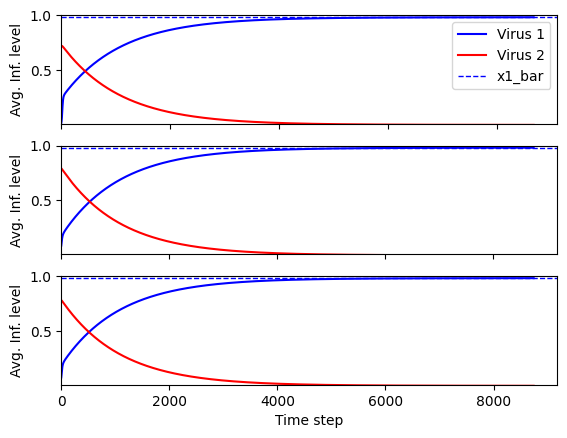

In [15]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for i in range(3):
    pertubation = np.random.uniform(0, 0.1)
    x1.fill(pertubation)
    print("x1 is " + str(x1))
    x2 = x2_bar + pertubation * np.ones(config.N)
    print("x2 is " + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)

    # record results
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), yscale='linear')


## Part iii. the Equilibrium point ($\bar{x}_1, 0$) is locally exponentially stable

To validate part iii) of the theorem, we will add a small pertubation to ($\bar{x}_1, 0$) and use that as the initial conditions for the simulation. We expect to see the system converge back to ($\bar{x}_1, 0$) exponentially.

x1 is [0.96333476 0.97390979 0.97047909 0.97333386 0.9712249  0.96477949
 0.9644283  0.96965462 0.96515305 0.97455252 0.95787097 0.94837115
 0.95638294 0.95699144 0.9680809  0.96937972 0.96465728 0.97293269
 0.96030368 0.96435283]
x2 is [0.01519852 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852
 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852
 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852
 0.01519852 0.01519852]
All assumptions satisfied
Main loop Converged at iteration 4469
x1 is [0.88345095 0.89402598 0.89059528 0.89345005 0.89134109 0.88489567
 0.88454449 0.88977081 0.88526924 0.8946687  0.87798716 0.86848734
 0.87649912 0.87710763 0.88819709 0.88949591 0.88477347 0.89304887
 0.88041986 0.88446901]
x2 is [0.09508233 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233
 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233
 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233
 0.09508233 0.09508233]
All assumpti

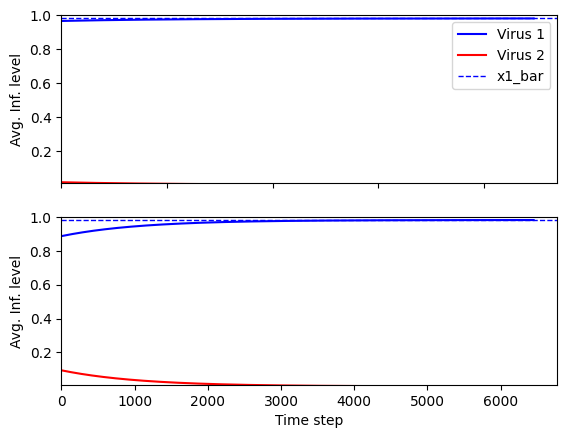

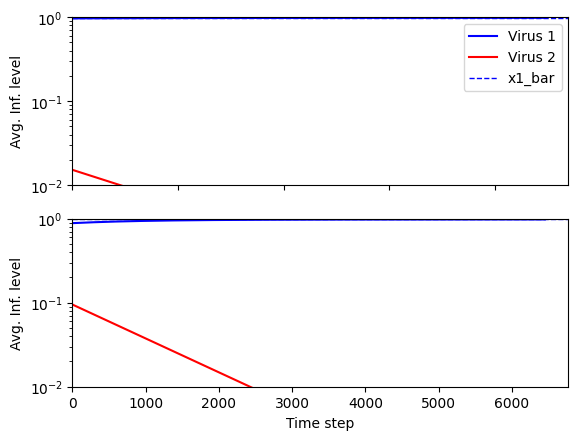

In [16]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for i in range(2):
    pertubation = np.random.uniform(0, 0.1)
    x1 = x1_bar - pertubation * np.ones(config.N)
    print("x1 is " + str(x1))
    x2.fill(pertubation)
    print("x2 is " + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)

    # record results
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), yscale='linear')
bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), yscale='log')